In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv(r"../datafiles/Position_Salaries.csv")

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df[["Level"]].values

In [5]:
X.shape

(10, 1)

In [6]:
y = df["Salary"].values

In [7]:
y.shape

(10,)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(X, y).score(X,y)

0.6690412331929895

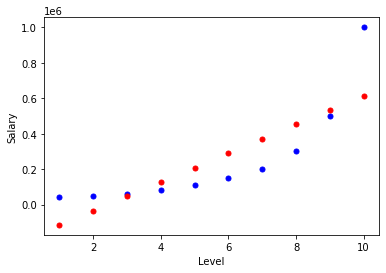

In [10]:
plt.scatter(X,y, color='b', s=25)
plt.scatter(X,model.predict(X), color='r', s=25)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [11]:
## Add polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly2 = PolynomialFeatures(degree=2)
type(poly2)

sklearn.preprocessing._data.PolynomialFeatures

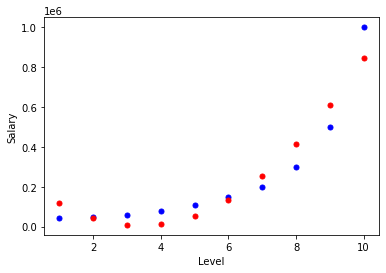

In [13]:
X2 = poly2.fit_transform(X)
X2
model2 = LinearRegression()
model2.fit(X2, y).score(X2,y)
plt.scatter(X,y, color='b', s=25)
plt.scatter(X,model2.predict(X2), color='r', s=25)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [14]:
poly3 = PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(X)

In [15]:
X3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [16]:
model3 = LinearRegression()
model3.fit(X3, y).score(X3,y)

0.9812097727913367

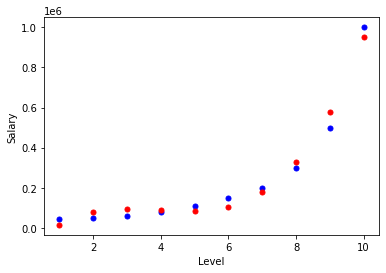

In [17]:
plt.scatter(X,y, color='b', s=25)
plt.scatter(X,model3.predict(X3), color='r', s=25)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [18]:
# For level 2.5 and level 10, what are predicted salaries of each model
test_vals = np.array([[2.5],[10]]).reshape(-1,1)
test_vals

array([[ 2.5],
       [10. ]])

In [19]:
print(model.predict(test_vals))

[  6863.63636364 613454.54545455]


In [20]:
print(model2.predict(poly2.transform(test_vals)))

[ 21437.5        846636.36363636]


In [21]:
print(model3.predict(poly3.transform(test_vals)))

[ 91272.29020978 950461.53846154]


## Writing model and preprocessing object to a file

In [22]:
import pickle

In [24]:
f1 = open('test.h5','wb')
pickle.dump(model2, f1)
pickle.dump(poly2, f1)
f1.close()